Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Libraries

In [3]:
import umint
import random
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import spearmanr, pearsonr
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

/home/chayan/anaconda3/envs/umint/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing Data

In [4]:
dir = '/home/chayan/UMINT/pbmc10k/preprocessed_hvg/'
rna = pd.read_csv(dir+'pbmc10k_rna_hvg_matched_cells.csv',header = 0 , index_col= 0)
atac = pd.read_csv(dir+'pbmc10k_atac_hvg_matched_cells.csv',header = 0 , index_col= 0)

rna_labels = pd.read_csv(dir+'pbmc10k_groundTruth_rna.csv',header = 0 , index_col= 0)
atac_labels = pd.read_csv(dir+'pbmc10k_groundTruth_atac.csv',header = 0 , index_col= 0)

x1 = rna
x2 = atac
y1 = rna_labels
y2 = atac_labels

z = pd.concat([x1, x2], axis=1)

In [5]:
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025
AAACAGCCAATCCCTT-1,1.102886,3.370006,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,-0.011314,-0.106943,-0.172993
AAACAGCCAATGCGCT-1,0.560188,-0.274663,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,0.612131,-0.106943,-0.172993
AAACAGCCAGGATAAC-1,-0.665826,-0.274663,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,0.774370,-0.106943,-0.172993
AAACAGCCAGTAGGTG-1,-0.665826,-0.274663,-0.162348,-0.16983,1.682746,-0.095876,10.00000,-0.358511,-0.237459,2.051676,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,0.566524,-0.106943,-0.172993
AAACAGCCAGTTTACG-1,1.139774,-0.274663,-0.162348,-0.16983,-0.343675,-0.095876,-0.08732,-0.358511,-0.237459,-0.246285,...,-0.122628,-0.074108,-0.122223,-0.345077,-0.123245,-0.158037,-0.08455,1.266671,-0.106943,-0.172993


In [6]:
x2.head()

,0,1,2,3,4,5,6,7,8,9,...,19420,19421,19422,19423,19424,19425,19426,19427,19428,19429
AAACAGCCAATCCCTT-1,-0.168695,1.914308,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,-0.332080,0.709562,...,-0.295279,-0.178485,-0.126761,-0.284094,3.172661,-0.117172,0.812724,-0.118194,-0.147035,-0.167044
AAACAGCCAATGCGCT-1,-0.168695,1.258737,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,2.679726,-0.884087,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,-0.845831,-0.118194,-0.147035,-0.167044
AAACAGCCAGGATAAC-1,-0.168695,-0.709808,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,-0.332080,-0.884087,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,-0.845831,-0.118194,-0.147035,-0.167044
AAACAGCCAGTAGGTG-1,-0.168695,0.386950,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,1.489172,0.543075,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,1.008836,-0.118194,-0.147035,-0.167044
AAACAGCCAGTTTACG-1,-0.168695,1.108218,-0.206382,-0.158,-0.141946,-0.261559,-0.223269,-0.154675,2.484665,0.653973,...,-0.295279,-0.178485,-0.126761,-0.284094,-0.281919,-0.117172,1.439804,-0.118194,-0.147035,-0.167044


In [7]:
le = preprocessing.LabelEncoder()
y1 = pd.DataFrame(le.fit_transform(np.ravel(rna_labels)))
y2 = pd.DataFrame(le.fit_transform(np.ravel(atac_labels)))

In [8]:
np.unique(y1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.unique(y2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Proposed UMINT architecture
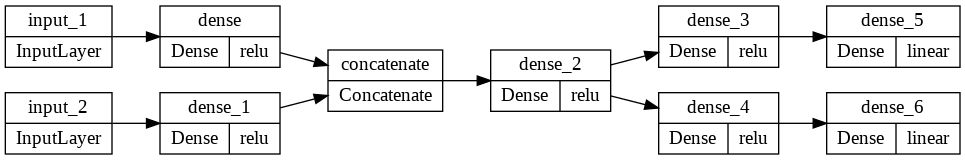

In [10]:
# Original pair-wise distances
dist_orig1 = np.square(euclidean_distances(x1, x1)).flatten()
dist_orig2 = np.square(euclidean_distances(x2, x2)).flatten()

In [11]:
num_clusters = len(np.unique(y1))
recons={}
result_agl = {}
result_km = {}
seed = []

for i in range(1):
    print('#Run: ', i+1)
    
    sd = random.randint(0, 100)
    seed.append(sd)
    
    x1_train, x1_test, x2_train, x2_test, z_train, z_test, y1_train, y1_test, y2_train, y2_test = train_test_split(x1, x2, z, y1, y2, test_size=0.2, random_state=sd)
    #UMINT
    MyEncoder, MyAE = umint.CombinedEncoder([x1_train, x2_train], [x1_test, x2_test], [128, 128], 64, 98, 0.0001, 0.001, 25, 16)
    low = MyEncoder.predict([x1, x2])
    clusters_agl = AgglomerativeClustering(n_clusters= num_clusters).fit_predict(low)
    clusters_km = KMeans(n_clusters= num_clusters).fit_predict(low)
    
    # pair-wise distances
    dist_EncoderRNA = np.square(euclidean_distances(MyAE.predict([x1, x2])[0], MyAE.predict([x1, x2])[0])).flatten()
    dist_EncoderADT = np.square(euclidean_distances(MyAE.predict([x1, x2])[1], MyAE.predict([x1, x2])[1])).flatten()  
    coef_RNA, p_RNA = pearsonr(dist_orig1, dist_EncoderRNA)
    coef_ADT, p_ADT = pearsonr(dist_orig2, dist_EncoderADT)

    
    recons[i] = [coef_RNA, coef_ADT]
    result_agl[i] = [adjusted_rand_score(y1[0], clusters_agl), fowlkes_mallows_score(y1[0], clusters_agl)]
    result_km[i] = [adjusted_rand_score(y1[0], clusters_km), fowlkes_mallows_score(y1[0], clusters_km)]
    
    result_agl[i+1] = [adjusted_rand_score(y2[0], clusters_agl), fowlkes_mallows_score(y2[0], clusters_agl)]
    result_km[i+1] = [adjusted_rand_score(y2[0], clusters_km), fowlkes_mallows_score(y2[0], clusters_km)]

#Run:  1
Epoch 1/25
379/379 [==============================] - 20s 50ms/step - loss: 12.3906 - modality1_output_loss: 0.9017 - modality2_output_loss: 1.0956 - val_loss: 11.9561 - val_modality1_output_loss: 0.8821 - val_modality2_output_loss: 1.0918
Epoch 2/25
379/379 [==============================] - 18s 47ms/step - loss: 11.8408 - modality1_output_loss: 0.8758 - modality2_output_loss: 1.0854 - val_loss: 11.8454 - val_modality1_output_loss: 0.8789 - val_modality2_output_loss: 1.0894
Epoch 3/25
379/379 [==============================] - 17s 46ms/step - loss: 11.7837 - modality1_output_loss: 0.8728 - modality2_output_loss: 1.0828 - val_loss: 11.8281 - val_modality1_output_loss: 0.8761 - val_modality2_output_loss: 1.0884
Epoch 4/25
379/379 [==============================] - 18s 47ms/step - loss: 11.7610 - modality1_output_loss: 0.8707 - modality2_output_loss: 1.0812 - val_loss: 11.8250 - val_modality1_output_loss: 0.8757 - val_modality2_output_loss: 1.0879
Epoch 5/25
379/379 [===========

In [12]:
r1 = [pd.DataFrame(np.ravel(recons[i])).T for i in range(len(recons))]
rec1 = pd.concat(r1)
rec1.index = range(len(recons))
rec1.columns = ['Pearson_RNA_UMINT','Pearson_ATAC_UMINT']
rec1

,Pearson_RNA_UMINT,Pearson_ATAC_UMINT
0,0.593067,0.127477


In [13]:
r2 = [pd.DataFrame(np.ravel(result_agl[i])).T for i in range(len(result_agl))]
rec2 = pd.concat(r2)
rec2.index = ['VsRNA_Celltype','VsATAC_Celltype']
rec2.columns = ['ARI_Agglomaretive','FMI_Agglomaretive']
rec2

,ARI_Agglomaretive,FMI_Agglomaretive
VsRNA_Celltype,0.755929,0.793081
VsATAC_Celltype,0.762865,0.799522


In [14]:
r3 = [pd.DataFrame(np.ravel(result_km[i])).T for i in range(len(result_km))]
rec3 = pd.concat(r3)
rec3.index = ['VsRNA_Celltype','VsATAC_Celltype']
rec3.columns = ['ARI_KMeans','FMI_KMeans']
rec3

,ARI_KMeans,FMI_KMeans
VsRNA_Celltype,0.695087,0.741127
VsATAC_Celltype,0.718582,0.761819


In [18]:
# Run UMAP 
low_umap = umap.UMAP(n_components=2).fit_transform(low)

In [19]:
lab1 = [rna_labels['celltype'][i] for i in range(rna_labels.shape[0])]
lab2 = [atac_labels['celltype'][i] for i in range(atac_labels.shape[0])]

col=['blue', 'green', 'orange', 'red', 'pink', 'gray', 'violet',
    'cyan','lime', 'royalblue' , 'skyblue', 'olive', 'tomato',
    'saddlebrown', 'sienna', 'navy', 'darkgreen', 'crimson']

classes1 = list(np.unique(lab1))
values1 = list(y1[0])
colors1 = ListedColormap(col)

classes2 = list(np.unique(lab2))
values2 = list(y2[0])
colors2 = ListedColormap(col)

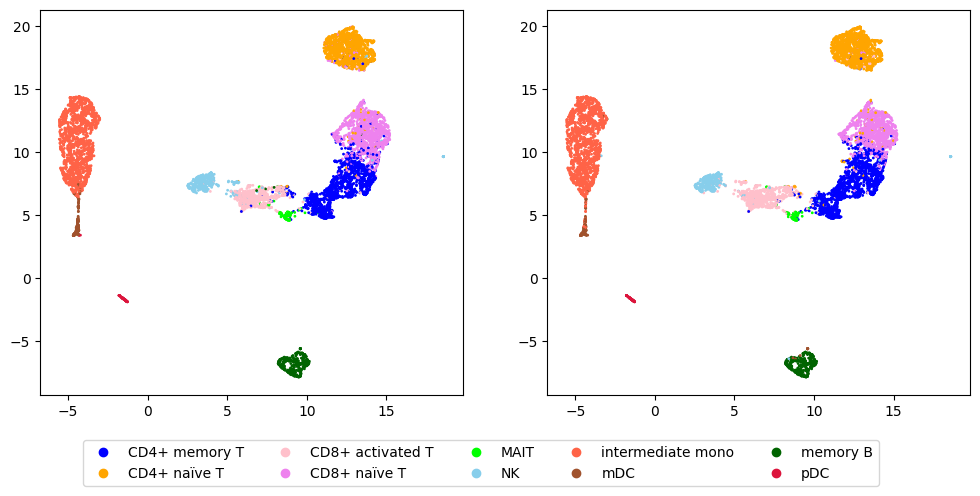

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
scatter = axes[0].scatter(low_umap[:,0],low_umap[:,1], c=values1, cmap=colors1, s=1)
axes[0].legend(handles=scatter.legend_elements()[0], labels=classes1, bbox_to_anchor = (2.0, -0.1), ncol=5)
scatter = axes[1].scatter(low_umap[:,0],low_umap[:,1], c=values2, cmap=colors2, s=1)